To achieve the ultimate goal, namely, the use of various machine learning algorithms to build a model explaining whether a particular person used cocaine last month based on a training sample generating a forecast for all observations from the test sample, the following algorithms were used: SVM, BalancedRandomForestClassifier. The algorithms were chosen based on the principle of knowledge, the SVM results did not meet expectations, since this algorithm is not designed for such a task, although it showed a result not much different from another algorithm. The keys in the grid were used as hyperparameters. As a result of the work , the following results were obtained: 0.70 and 0.71 respectively.

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.model_selection import cross_validate
from sklearn.svm import SVC
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
df = pd.read_csv('drugs_train.csv')


</br>There are more young representatives in the data

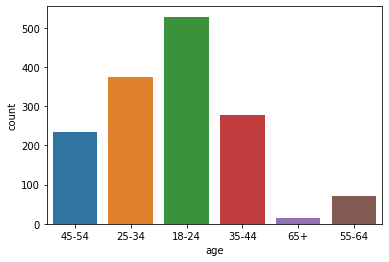

In [ ]:
sns.countplot(x = 'age', data=df)

</br>There are more representatives from the United States and Australia in the data

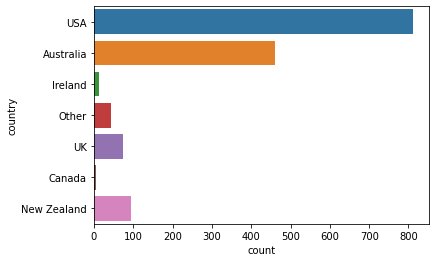

In [ ]:
sns.countplot(y = 'country', data=df);

</br>Equal number of male and female representatives

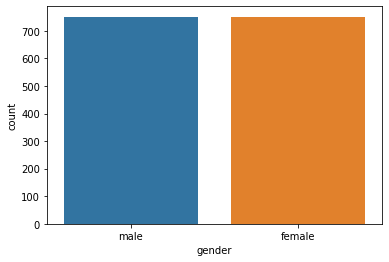

In [ ]:
sns.countplot(x = 'gender', data=df);

</br>There are also more representatives of Mixed-Black/Asian race in the data

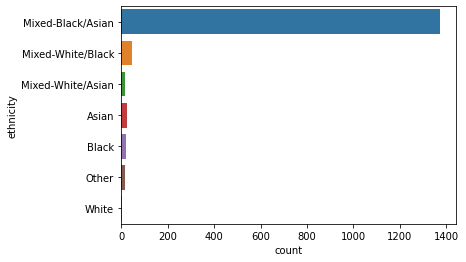

In [ ]:
sns.countplot(y = 'ethnicity', data=df);

</br>This barplot shows that impulsive people use cocaine more often than less impulsive people.

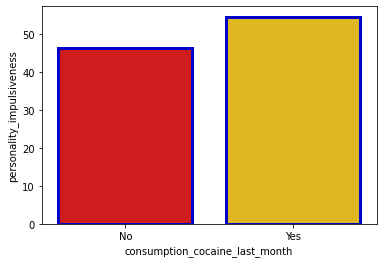

In [ ]:
sns.barplot(y='personality_impulsiveness',x='consumption_cocaine_last_month', data=df, ci=None,
           color='aliceblue',
           edgecolor='mediumblue',
           palette='hot',
           lw=3);

</br>You can also notice that impulsive people use nicotine more.

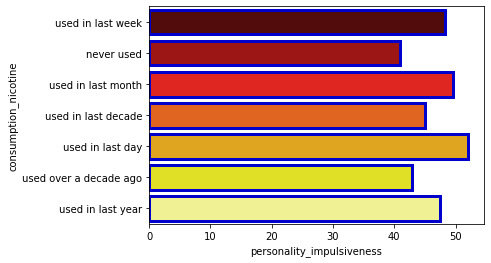

In [ ]:
sns.barplot(x='personality_impulsiveness',y='consumption_nicotine', data=df, ci=None,
           color='aliceblue',
           edgecolor='mediumblue',
           palette='hot',
           lw=3)

</br>The situation is similar with cannabis.

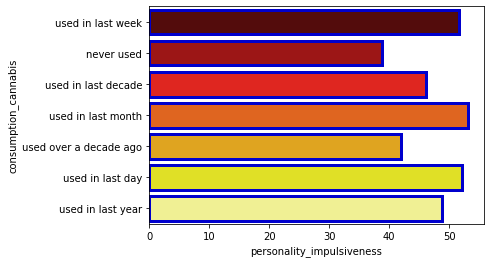

In [ ]:
sns.barplot(x='personality_impulsiveness',y='consumption_cannabis', data=df, ci=None,
           color='aliceblue',
           edgecolor='mediumblue',
           palette='hot',
           lw=3)

</br> Reading test data

In [ ]:
df_1 = pd.read_csv('drugs_test.csv')

</br> To begin with, we convert the columns consumption, age and consumption_cocaine_last_month to numeric non-numeric values.

In [ ]:
mapper_1 = {'used in last day': 1, 'used in last week': 2, 'used in last month': 3, 'used in last year': 4, 'never used': 0, 'used in last decade': 5, 'used over a decade ago': 6}
ordinal_cols = ['consumption_alcohol','consumption_amphetamines', 'consumption_caffeine','consumption_cannabis', 'consumption_chocolate','consumption_mushrooms', 'consumption_nicotine']

df = df.replace(mapper_1)

mapper_2 = {'45-54': 4, '25-34': 2, '18-24': 1, '35-44': 3, '65+': 6, '55-64': 5}  
df = df.replace(mapper_2)

mapper_3 = {'No': 0, 'Yes': 1}  
df = df.replace(mapper_3)

df.head()

,id,age,gender,education,country,ethnicity,personality_neuroticism,personality_extraversion,personality_openness,personality_agreeableness,...,personality_impulsiveness,personality_sensation,consumption_alcohol,consumption_amphetamines,consumption_caffeine,consumption_cannabis,consumption_chocolate,consumption_mushrooms,consumption_nicotine,consumption_cocaine_last_month
0,train_0001,4,male,Masters degree,USA,Mixed-Black/Asian,57.6,57.3,50.1,47.8,...,42.8,22.4,2,6,1,2,1,0,2,0
1,train_0002,2,male,University degree,USA,Mixed-Black/Asian,47.8,67.0,45.7,47.8,...,33.8,30.8,2,0,2,0,1,0,0,0
2,train_0003,1,female,University degree,USA,Mixed-Black/Asian,57.6,43.3,55.3,45.6,...,63.0,62.0,3,0,1,2,2,4,3,0
3,train_0004,2,female,Masters degree,USA,Mixed-Black/Asian,71.8,31.2,43.6,56.3,...,63.0,71.1,1,0,1,5,1,0,5,0
4,train_0005,1,male,"Some college or university, no certificate or ...",Australia,Mixed-Black/Asian,56.1,62.3,70.2,66.1,...,50.4,62.0,2,0,3,3,1,4,3,0


In [ ]:
df_1 = df_1.replace(mapper_1)
df_1 = df_1.replace(mapper_2)

</br>We use OneHotEncoder for ease of comparison.

In [ ]:


categorical_cols = ['gender', 'education', 'country', 'ethnicity']
enc = OneHotEncoder(sparse=False, categories='auto')

transformed_data = enc.fit_transform(df[categorical_cols])
encoded_data = pd.DataFrame(transformed_data, index=df.index)
df = df.drop(columns=categorical_cols, axis=1) 
df = df.drop(columns=['id'], axis=1)
df = pd.concat([df, encoded_data], axis=1)
df.head()

transformed_data = enc.transform(df_1[categorical_cols])
encoded_data = pd.DataFrame(transformed_data, index=df_1.index)
df_1 = df_1.drop(columns=categorical_cols, axis=1) 
df_1 = df_1.drop(columns=['id'], axis=1)
df_1 = pd.concat([df_1, encoded_data], axis=1)

In [ ]:
df.head()

,age,personality_neuroticism,personality_extraversion,personality_openness,personality_agreeableness,personality_conscientiousness,personality_impulsiveness,personality_sensation,consumption_alcohol,consumption_amphetamines,...,15,16,17,18,19,20,21,22,23,24
0,4,57.6,57.3,50.1,47.8,53.7,42.8,22.4,2,6,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2,47.8,67.0,45.7,47.8,56.0,33.8,30.8,2,0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1,57.6,43.3,55.3,45.6,49.9,63.0,62.0,3,0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,2,71.8,31.2,43.6,56.3,31.8,63.0,71.1,1,0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1,56.1,62.3,70.2,66.1,42.4,50.4,62.0,2,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
df_1.head()

,age,personality_neuroticism,personality_extraversion,personality_openness,personality_agreeableness,personality_conscientiousness,personality_impulsiveness,personality_sensation,consumption_alcohol,consumption_amphetamines,...,15,16,17,18,19,20,21,22,23,24
0,1,37.7,74.2,60.2,45.6,40.6,63.0,71.1,1,0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,4,62.3,47.6,73.1,43.5,60.9,56.5,71.1,1,6,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,4,56.1,52.6,34.9,58.5,58.4,56.5,38.8,2,0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,3,71.8,50.1,45.7,39.0,42.4,63.0,46.6,5,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,3,62.3,41.2,19.2,39.0,22.3,42.8,38.8,5,1,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


</br>Divide the axes by x and y

In [ ]:
y = df['consumption_cocaine_last_month'] 
x = df.drop(columns=['consumption_cocaine_last_month'], axis=1)


</br>For x, we use min max scale r, which subtracts the minimum value in the object and divides it by a range, where the range is the difference between the original maximum and the original minimum

In [ ]:
scaler = MinMaxScaler()
x = pd.DataFrame(scaler.fit_transform(x), index=df.index) 
scaler = MinMaxScaler()
df_1 = pd.DataFrame(scaler.fit_transform(df_1), index=df_1.index)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
x.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,0.6,0.576,0.573,0.501,0.478,0.537,0.428,0.224,0.333333,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.2,0.478,0.670,0.457,0.478,0.560,0.338,0.308,0.333333,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.576,0.433,0.553,0.456,0.499,0.630,0.620,0.500000,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.2,0.718,0.312,0.436,0.563,0.318,0.630,0.711,0.166667,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.561,0.623,0.702,0.661,0.424,0.504,0.620,0.333333,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


</br>Next, we make a division into train and test

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 42)

# SVM

The first algorithm used is SVM, whose main task is to find the correct line or hyperplane separating the data into two classes. After applying the model, an average result of 0.7 was obtained

</br>To begin with, we use basic cross-validation

In [ ]:

model = SVC()
cv_results = cross_validate(model, x, y, cv=4, scoring='balanced_accuracy')
cv_results['test_score'], cv_results['test_score'].sum()/4

(array([0.5, 0.5, 0.5, 0.5]), 0.5)

</br> Next, narrow the search area and re-apply grid_search for 1584 options

In [ ]:


param_grid = {'C': [0.001, 0.005, 0.01, 0.02, 0.04, 0.06, 0.08, 0.1, 1, 2, 5, 10],
               'gamma': [x for x in range(1, 10)] + [0.1, 0.01], 
               'kernel': ['rbf', 'poly', 'sigmoid', 'linear'],
              'class_weight': ['balanced']}

svm = SVC(random_state=42)
grid_search = GridSearchCV(svm, param_grid, cv = 3, n_jobs = -1, verbose = 2, scoring='balanced_accuracy')
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 528 candidates, totalling 1584 fits


{'C': 2, 'class_weight': 'balanced', 'gamma': 0.1, 'kernel': 'rbf'}

</br>We get the following results for balanced_accuracy using cross_validation, as well as the average value.

In [ ]:
svm_best = grid_search.best_estimator_
cv_results = cross_validate(svm_best, x, y, cv=4, scoring='balanced_accuracy')
cv_results['test_score'], cv_results['test_score'].sum()/4

(array([0.70222243, 0.71214468, 0.73423834, 0.67547376]), 0.7060198022583271)

## </br>BalancedRandomForestClassifier

The next algorithm to apply is BalancedRandomForestClassifier which is that it randomly undersamples each initial load sample to balance it and it makes it possible to get a final average result of 0.71

In [ ]:


brf = BalancedRandomForestClassifier(random_state=45)

param_grid = {
    'max_depth': [x for x in range(60, 120, 5)],
    'min_samples_split': [x for x in range(7,15)],
    'n_estimators': [x for x in range(1,8)],
    'min_samples_leaf': [x for x in range(1,8)],
    'criterion': ['gini', 'entropy'],
    'max_features': ['auto', 'sqrt', 'log2']
}

rf_random = RandomizedSearchCV(brf, param_grid, cv=3, n_jobs=-1, scoring='balanced_accuracy', random_state=40)
rf_random.fit(X_train, y_train)
rf_random.best_params_

{'criterion': 'gini',
 'max_depth': 110,
 'max_features': 'log2',
 'min_samples_leaf': 7,
 'min_samples_split': 11,
 'n_estimators': 7}

In [ ]:
rf_best = rf_random.best_estimator_
cv_results = cross_validate(rf_best, x, y, cv=4, scoring='balanced_accuracy')
cv_results['test_score'], cv_results['test_score'].sum()/4

(array([0.72125844, 0.71861334, 0.68362792, 0.74485241]), 0.7170880246255077)

In [ ]:
pred = rf_best.predict(df_1)
pd.DataFrame(pred).to_csv('cocaine.csv', index=False)